<a href="https://colab.research.google.com/github/sohaimainam98/BRAIN-TUMOR/blob/main/BRAIN_TUMOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from random import choices
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout

In [2]:
!unzip "/content/drive/MyDrive/brain.zip" -d Test

Archive:  /content/drive/MyDrive/brain.zip
  inflating: Test/brain_tumor_dataset/no/1 no.jpeg  
  inflating: Test/brain_tumor_dataset/no/10 no.jpg  
  inflating: Test/brain_tumor_dataset/no/11 no.jpg  
  inflating: Test/brain_tumor_dataset/no/12 no.jpg  
  inflating: Test/brain_tumor_dataset/no/13 no.jpg  
  inflating: Test/brain_tumor_dataset/no/14 no.jpg  
  inflating: Test/brain_tumor_dataset/no/15 no.jpg  
  inflating: Test/brain_tumor_dataset/no/17 no.jpg  
  inflating: Test/brain_tumor_dataset/no/18 no.jpg  
  inflating: Test/brain_tumor_dataset/no/19 no.jpg  
  inflating: Test/brain_tumor_dataset/no/2 no.jpeg  
  inflating: Test/brain_tumor_dataset/no/20 no.jpg  
  inflating: Test/brain_tumor_dataset/no/21 no.jpg  
  inflating: Test/brain_tumor_dataset/no/22 no.jpg  
  inflating: Test/brain_tumor_dataset/no/23 no.jpg  
  inflating: Test/brain_tumor_dataset/no/24 no.jpg  
  inflating: Test/brain_tumor_dataset/no/25 no.jpg  
  inflating: Test/brain_tumor_dataset/no/26 no.jpg  
  i

In [3]:
input_path='/content/Test'
for file in os.listdir(input_path):
    print(file)

brain_tumor_dataset
no
yes


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


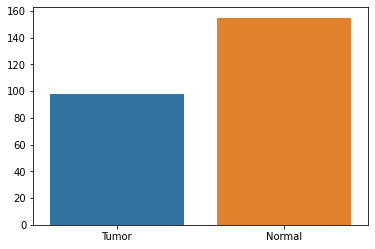

In [4]:
type1=len(os.listdir(input_path+'/no'))
type2=len(os.listdir(input_path+'/yes'))

count=[type1,type2]
label=['Tumor','Normal']

sns.barplot(label,count)

In [5]:
def show_image(folder):
    path=os.path.join(input_path,folder)
    
    images=choices(os.listdir(path),k=4)
    images=[os.path.join(path,file) for file in images]
    
    return images

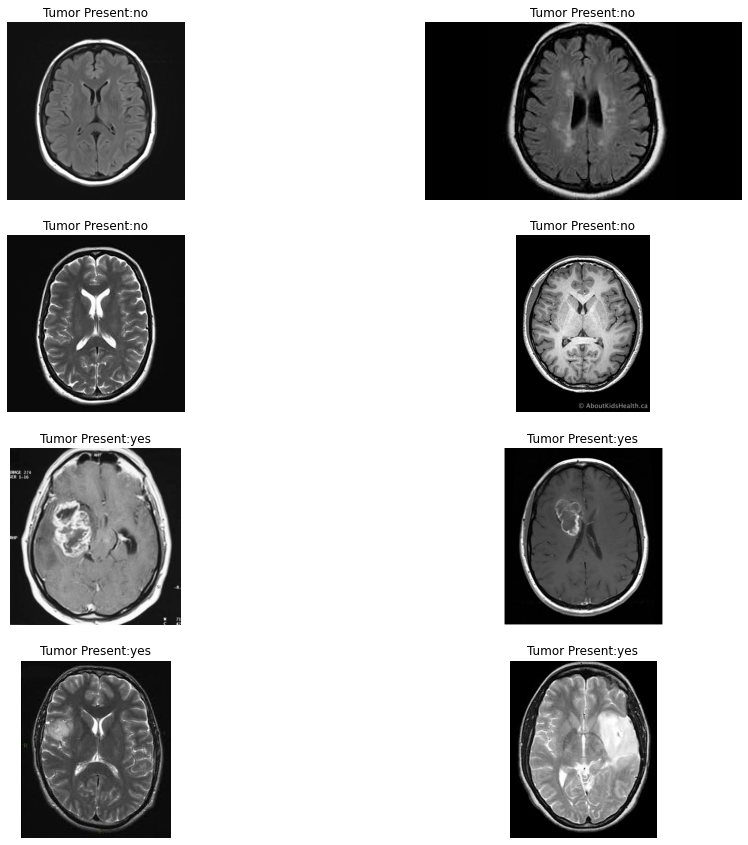

In [6]:
img1=show_image('no')
img2=show_image('yes')
label1=['no']*4
label2=['yes']*4

images=img1+img2
labels=label1+label2

plt.figure(figsize=(16,15))

for i,path_name in enumerate(images):
    plt.subplot(4,2,i+1)
    image=cv.imread(path_name)
    plt.imshow(image)
    plt.title("Tumor Present:"+labels[i])
    plt.axis('off')

In [7]:


datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.3, 1.5],
                             validation_split=0.2
                            )

train_gen= datagen.flow_from_directory(input_path,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='training'
                                      )
val_gen = datagen.flow_from_directory( input_path,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='validation'
                                      )



Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [8]:
vgg_model=VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)
model=keras.Sequential()
for layer in vgg_model.layers:
    model.add(layer)
for layer in model.layers:
    layer.trainable=False

58892288/58889256 [==============================] - 1s 0us/step


In [9]:
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [12]:
stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=30
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model.fit(train_gen,validation_data=val_gen,epochs=30,callbacks=[stop,checkpoint])

Epoch 1/30
13/13 [==============================] - 9s 684ms/step - loss: 1.4040 - accuracy: 0.2340 - val_loss: 1.8432 - val_accuracy: 0.1900
Epoch 2/30
13/13 [==============================] - 8s 591ms/step - loss: 1.1133 - accuracy: 0.2340 - val_loss: 0.6994 - val_accuracy: 0.1800
Epoch 3/30
13/13 [==============================] - 8s 593ms/step - loss: 0.8950 - accuracy: 0.2463 - val_loss: 1.1596 - val_accuracy: 0.2000
Epoch 4/30
13/13 [==============================] - 8s 592ms/step - loss: 0.6337 - accuracy: 0.2266 - val_loss: 0.9759 - val_accuracy: 0.3100
Epoch 5/30
13/13 [==============================] - 8s 582ms/step - loss: 0.5254 - accuracy: 0.2586 - val_loss: 0.8201 - val_accuracy: 0.2100
Epoch 6/30
13/13 [==============================] - 8s 587ms/step - loss: 0.8959 - accuracy: 0.2291 - val_loss: 0.8391 - val_accuracy: 0.2800
Epoch 7/30
13/13 [==============================] - 8s 588ms/step - loss: 0.8246 - accuracy: 0.2094 - val_loss: 1.0642 - val_accuracy: 0.1900
Epoch 

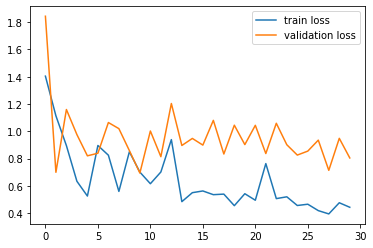

In [13]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

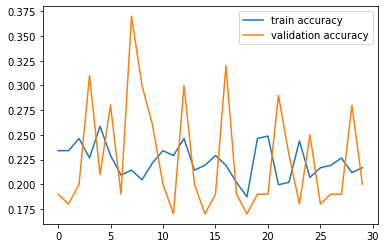

In [14]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()